In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
labels = pd.read_csv("./data/samples.csv")

In [4]:
labels_exp2 = pd.read_csv("./data/samples_experiment2.csv")

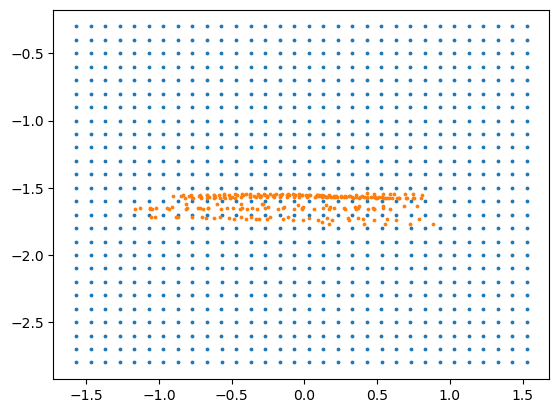

In [8]:
plt.scatter(labels.q_0, labels.q_3, s=3)
plt.scatter(labels_exp2.q_0, labels_exp2.q_3, s=3)

In [19]:
pwd = np.abs(labels_exp2.q_0.to_numpy()[:,None] - labels_exp2.q_0.to_numpy()[None,:])
closest = np.partition(pwd, 1, axis=1)[:,1]
np.mean(closest)

np.float64(0.004399883564716824)

In [15]:
import scipy.io.wavfile
import os

inputpath = "./data" 
inputlength =  5
SR = 16000
outputlength = 4096//2
applyFFT = True

inputfiles = os.listdir(inputpath)
n_files = len(labels)
filelen = scipy.io.wavfile.read(inputpath + "/" + "0.wav")[1].shape[0]

recordings = np.full((n_files, filelen, 4), np.nan, dtype=np.int16)


for indx, row in labels.iterrows():
    sr, data = scipy.io.wavfile.read(f"{inputpath}/{row.idx}.wav")
    recordings[indx,:,:] = data[:,1:5]

/home/tilman/miniforge3/envs/acousticSensing/lib/python3.12/site-packages/numpy/_core/numeric.py:362: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


Text(0.5, 0, 'Starttime of Window [s]')

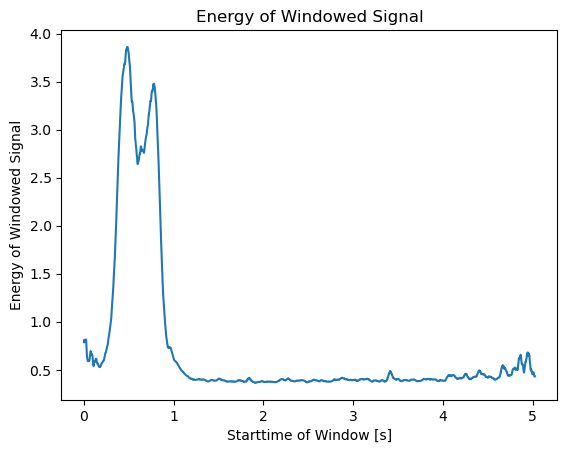

In [16]:
from numpy.lib.stride_tricks import sliding_window_view
normalized_recording = recordings[:,:,0]/np.max(np.abs(recordings[:,:,0]))
windowed_recording = sliding_window_view(normalized_recording**2, 500, axis=1)
energy_per_record = np.sum(windowed_recording, axis=2)

averaged_energy = np.average(energy_per_record, axis=0)
plt.plot(np.arange(len(averaged_energy))/16000, averaged_energy)
plt.title("Energy of Windowed Signal")
plt.ylabel("Energy of Windowed Signal")
plt.xlabel("Starttime of Window [s]")

In [17]:
len(np.unique(recordings[:,:,0]))

2306

In [18]:
np.log2(2306)

np.float64(11.171176797651771)

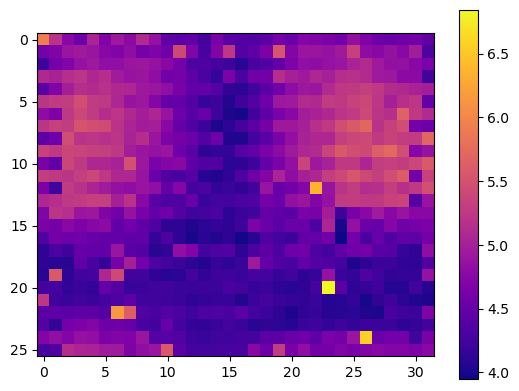

In [19]:
energy = np.sum(normalized_recording**2, axis=1)
grid = np.full((26,32), np.nan)
x_poses = []
for idx, row in labels.iterrows():
    x_pos = int(np.round((row.q_0 + 1.5708)/0.1,0))
    if x_pos < 0:
        continue#
    x_poses.append(x_pos)
    y_pos = int(np.round((row.q_3 +0.3)/-0.1, 0))
    #if energy[idx] > 300:
    #>    continue
    grid[y_pos, x_pos] = energy[idx]

plt.imshow(np.log(grid), cmap="plasma")
plt.colorbar()

0 357.8161705858814
406 486.5449145344412
585 209.37723815016201
646 233.75274472534116
773 664.531696011738
810 218.66487820618443


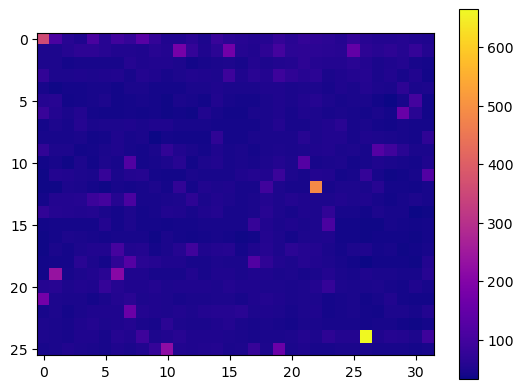

In [20]:
energy = np.sum(normalized_recording[:,16000:]**2, axis=1)
grid = np.full((26,32), np.nan)
x_poses = []
for idx, row in labels.iterrows():
    x_pos = int(np.round((row.q_0 + 1.5708)/0.1,0))
    if x_pos < 0:
        continue#
    x_poses.append(x_pos)
    y_pos = int(np.round((row.q_3 +0.3)/-0.1, 0))
    if energy[idx] > 200:
        print(idx, energy[idx])
    #>    continue
    grid[y_pos, x_pos] = energy[idx]

plt.imshow(grid, cmap="plasma")
plt.colorbar()

Text(0.5, 0, 'Starttime of Window [s]')

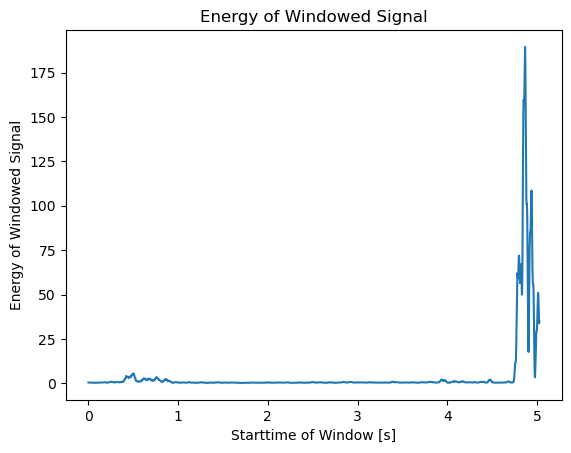

In [26]:
plt.plot(np.arange(len(averaged_energy))/16000, energy_per_record[773])
plt.title("Energy of Windowed Signal")
plt.ylabel("Energy of Windowed Signal")
plt.xlabel("Starttime of Window [s]")

In [27]:
labels.iloc[773]

idx              784
q_0             1.03
q_1              0.0
q_2              0.0
q_3             -2.7
q_4              0.0
q_5           1.5708
q_6              0.0
samples        80896
SR             16000
session_id         7
notes               
Name: 773, dtype: object

671 859.1654441188241


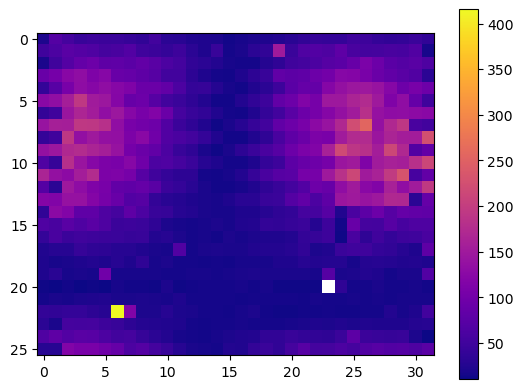

In [21]:
energy = np.sum(normalized_recording[:,:16000]**2, axis=1)
grid = np.full((26,32), np.nan)
x_poses = []
for idx, row in labels.iterrows():
    x_pos = int(np.round((row.q_0 + 1.5708)/0.1,0))
    if x_pos < 0:
        continue
    x_poses.append(x_pos)
    y_pos = int(np.round((row.q_3 +0.3)/-0.1, 0))
    if energy[idx] > 800:
        print(idx, energy[idx])
        continue
    grid[y_pos, x_pos] = energy[idx]

plt.imshow(grid, cmap="plasma")
plt.colorbar()

In [36]:
labels.iloc[671]

idx              677
q_0           0.7292
q_1              0.0
q_2              0.0
q_3             -2.3
q_4              0.0
q_5           1.5708
q_6              0.0
samples        80896
SR             16000
session_id         5
notes               
Name: 671, dtype: object

Text(0.5, 0, 'Starttime of Window [s]')

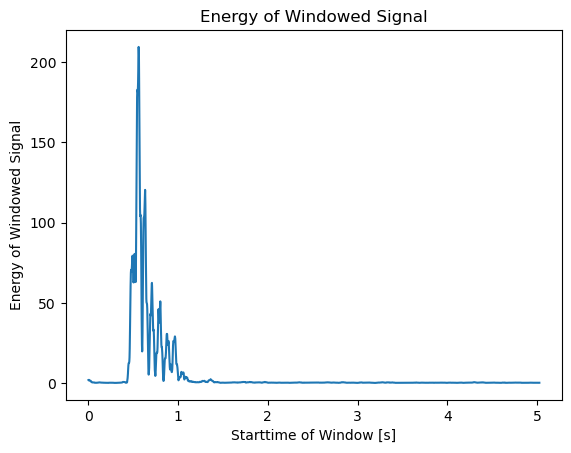

In [39]:
plt.plot(np.arange(len(averaged_energy))/16000, energy_per_record[671])
plt.title("Energy of Windowed Signal")
plt.ylabel("Energy of Windowed Signal")
plt.xlabel("Starttime of Window [s]")

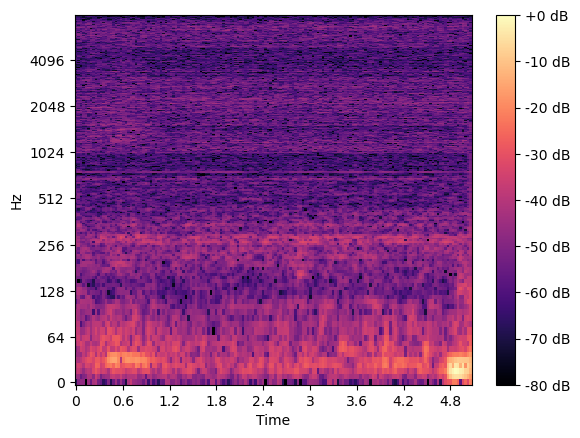

In [28]:
import librosa
sig = normalized_recording[773,:]

D = librosa.stft(sig)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
ref = np.max(np.abs(D))

fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, sr=16000, x_axis='time', y_axis="log", ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")

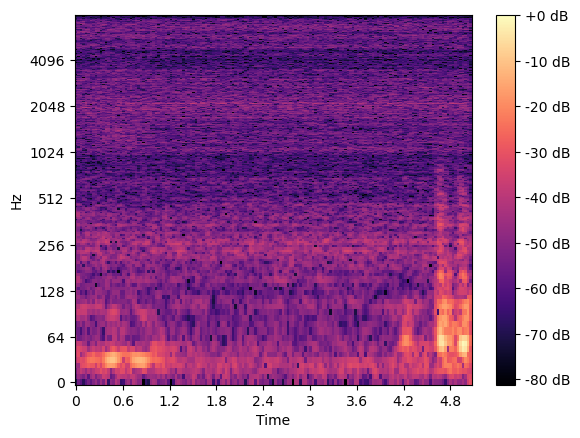

In [29]:
sig = normalized_recording[406,:]

D = librosa.stft(sig)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=ref)

fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, sr=16000, x_axis='time', y_axis="log", ax=ax, vmax=0)
fig.colorbar(img, ax=ax, format="%+2.f dB")

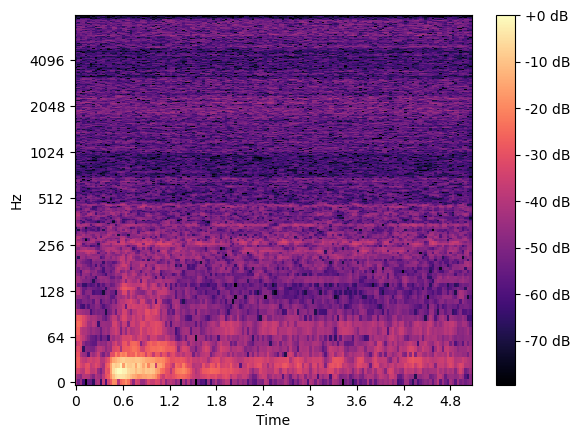

In [37]:
sig = normalized_recording[671,:]

D = librosa.stft(sig)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=ref)

fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, sr=16000, x_axis='time', y_axis="log", ax=ax, vmax=0)
fig.colorbar(img, ax=ax, format="%+2.f dB")

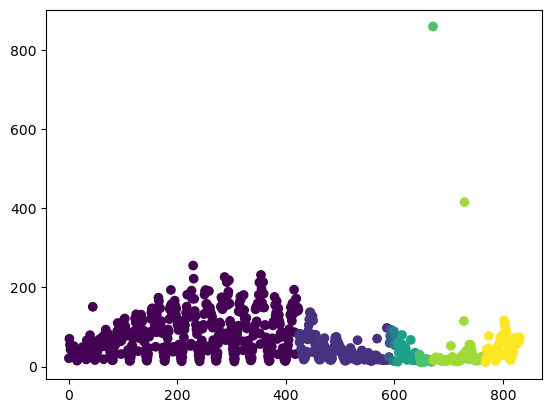

In [25]:
plt.scatter(np.arange(len(energy)), energy, c=labels.session_id)

In [31]:
def map_data_to_grid(data):
    grid = np.full((26,32), np.nan)
    for idx, row in labels.iterrows():
        x_pos = int(np.round((row.q_0 + 1.5708)/0.1,0))
        if x_pos < 0:
            continue
        y_pos = int(np.round((row.q_3 +0.3)/-0.1, 0))
        grid[y_pos, x_pos] = data[idx]
    return grid



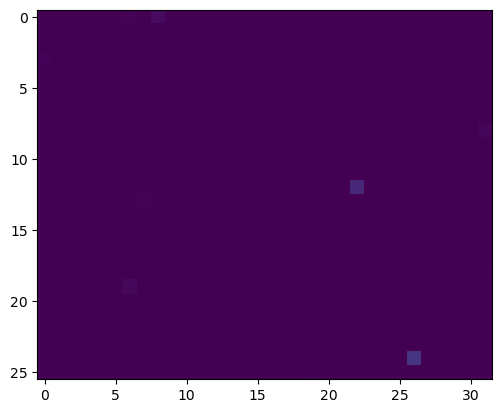

In [32]:
import matplotlib.animation as animation

maxval = np.max(energy_per_record)
minval = np.min(energy_per_record)

frames = []
fig = plt.figure()
for i in range(0, energy_per_record.shape[1], 640):
    frames.append([plt.imshow(map_data_to_grid(energy_per_record[:, i]), vmax=maxval, vmin=minval, animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=40, blit=True, repeat=False)
ani.save('energy.mp4')
plt.show()


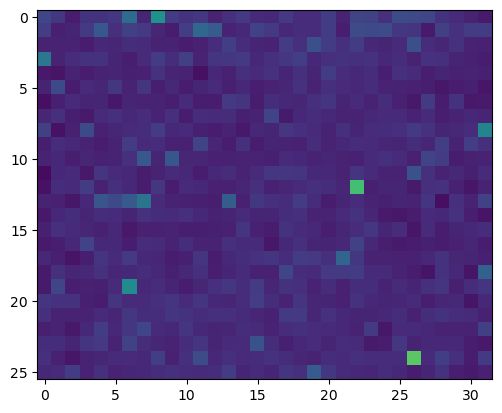

In [33]:
import matplotlib.animation as animation

maxval = np.log(np.max(energy_per_record))
minval = np.log(np.min(energy_per_record))

frames = []
fig = plt.figure()
for i in range(0, energy_per_record.shape[1], 640):
    frames.append([plt.imshow(np.log(map_data_to_grid(energy_per_record[:, i])), vmax=maxval, vmin=minval, animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=40, blit=True, repeat=False)
ani.save('energy_log.mp4')

In [35]:
q0

0.7292000000000003